In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.4 MB/s eta 0:00:00a 0:00:01


In [2]:
def read_file(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(file, sep=",")

In [4]:
df = read_file("/Users/guillermocomesanacimadevila/Kcal_Prediction/Data/calories.csv")

In [6]:
df.head(n=10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [8]:
df.shape

(15000, 9)

In [19]:
null = df.isnull().sum()

In [20]:
null # no empty cells

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

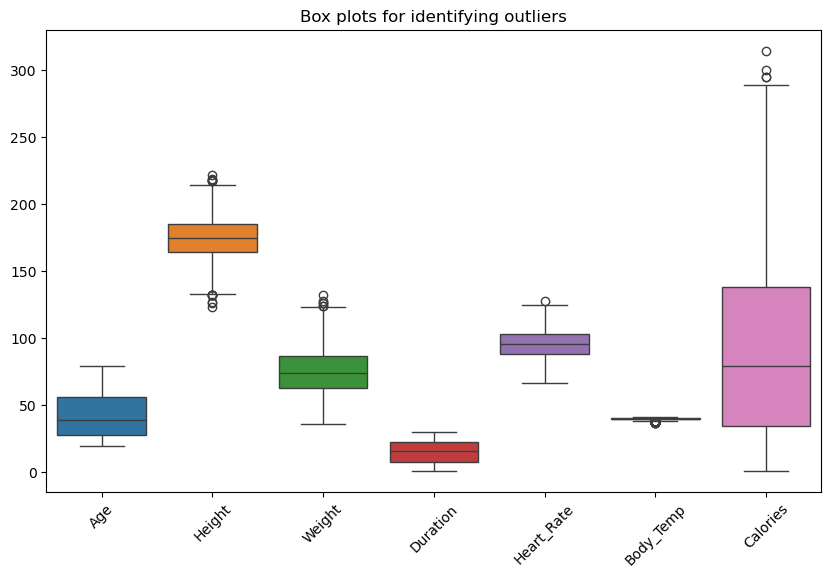

In [26]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df[["Gender", "Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "Calories"]])
plt.xticks(rotation=45)
plt.title("Box plots for identifying outliers")
plt.show()

In [27]:
df[["Gender", "Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "Calories"]].describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [28]:
# convert male and female from categorical to numerical
df["Gender"] = df["Gender"].map({"male": 1, "female": 0})

In [30]:
df # all good

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [32]:
skewed_features = df[["Gender", "Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "Calories"]].skew()

In [33]:
skewed_features

Gender        0.014135
Age           0.473383
Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
Calories      0.505371
dtype: float64

In [34]:
# scale the data into a 0-1 scale
scaler = MinMaxScaler()

In [35]:
cols = ["Gender", "Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "Calories"]
df[cols] = scaler.fit_transform(df[cols])

In [36]:
df.head(n=10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1.0,0.813559,0.676768,0.604167,0.965517,0.622951,0.840909,0.734824
1,14861698,0.0,0.000000,0.434343,0.250000,0.448276,0.442623,0.727273,0.207668
2,11179863,1.0,0.830508,0.565657,0.447917,0.137931,0.344262,0.363636,0.079872
3,16180408,0.0,0.237288,0.565657,0.364583,0.413793,0.540984,0.772727,0.223642
4,17771927,0.0,0.118644,0.313131,0.229167,0.310345,0.229508,0.613636,0.108626
5,15130815,0.0,0.271186,0.282828,0.145833,0.758621,0.475410,0.818182,0.389776
6,19602372,0.0,0.220339,0.353535,0.208333,0.724138,0.459016,0.772727,0.354633
7,11117088,1.0,0.355932,0.525253,0.510417,0.827586,0.540984,0.818182,0.453674
8,12132339,1.0,0.677966,0.636364,0.604167,0.689655,0.491803,0.750000,0.424920
9,17964668,0.0,0.101695,0.232323,0.156250,0.517241,0.377049,0.704545,0.226837


## Exploratory Analysis

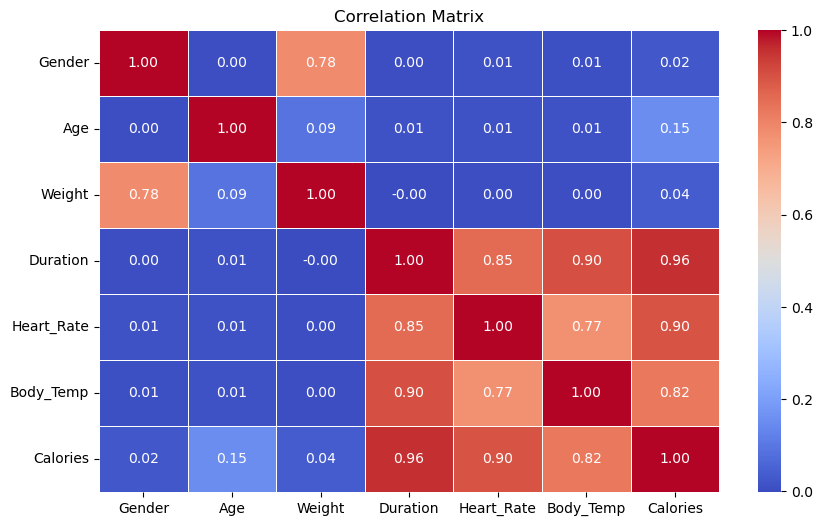

In [43]:
# correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

In [41]:
# drop crappy columns
df = df.drop(columns = ["User_ID", "Height"])

In [42]:
df

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1.0,0.813559,0.604167,0.965517,0.622951,0.840909,0.734824
1,0.0,0.000000,0.250000,0.448276,0.442623,0.727273,0.207668
2,1.0,0.830508,0.447917,0.137931,0.344262,0.363636,0.079872
3,0.0,0.237288,0.364583,0.413793,0.540984,0.772727,0.223642
4,0.0,0.118644,0.229167,0.310345,0.229508,0.613636,0.108626
...,...,...,...,...,...,...,...
14995,0.0,0.000000,0.520833,0.344828,0.409836,0.750000,0.140575
14996,0.0,0.118644,0.302083,0.172414,0.295082,0.477273,0.070288
14997,0.0,0.389831,0.229167,0.517241,0.377049,0.681818,0.236422
14998,1.0,0.983051,0.635417,0.034483,0.278689,0.272727,0.031949


## Model Training and Performance metrics

In [50]:
# split data
X = df.drop(columns=["Calories"])
y = df["Calories"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X # all columns except calories

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp
0,1.0,0.813559,0.604167,0.965517,0.622951,0.840909
1,0.0,0.000000,0.250000,0.448276,0.442623,0.727273
2,1.0,0.830508,0.447917,0.137931,0.344262,0.363636
3,0.0,0.237288,0.364583,0.413793,0.540984,0.772727
4,0.0,0.118644,0.229167,0.310345,0.229508,0.613636
...,...,...,...,...,...,...
14995,0.0,0.000000,0.520833,0.344828,0.409836,0.750000
14996,0.0,0.118644,0.302083,0.172414,0.295082,0.477273
14997,0.0,0.389831,0.229167,0.517241,0.377049,0.681818
14998,1.0,0.983051,0.635417,0.034483,0.278689,0.272727


In [54]:
y # intended predicted function

0        0.734824
1        0.207668
2        0.079872
3        0.223642
4        0.108626
           ...   
14995    0.140575
14996    0.070288
14997    0.236422
14998    0.031949
14999    0.309904
Name: Calories, Length: 15000, dtype: float64

In [57]:
models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest" : RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost" : XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

In [61]:
# training and evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R2 Score": r2, "MSE": rmse}

In [62]:
for model, metrics in results.items():
    print(f"{model}: R2 Score: {round(metrics["R2 Score"], 3)}, MSE: {round(metrics["MSE"], 3)}")

Linear Regression: R2 Score: 0.967, MSE: 0.037
Decision Tree: R2 Score: 0.993, MSE: 0.017
Random Forest: R2 Score: 0.998, MSE: 0.008
XGBoost: R2 Score: 0.999, MSE: 0.007
